In [2]:
"""Projeto para avalia diferentes modelos de previsão de série temporal."""

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, root_mean_squared_error

import pandas as pd
from db import executa_query, consulta_valores

import warnings
warnings.filterwarnings("ignore")

In [3]:
query = consulta_valores('Atendimento Individual', 'Tipo Produção', 'SÃO PAULO')

df = executa_query(query)
df

,value,year,month
0,70,2016,3
1,680,2016,5
2,370,2016,7
3,1150,2016,8
4,5200,2016,9
...,...,...,...
94,1562847,2024,3
95,1770423,2024,4
96,1646394,2024,5
97,1544733,2024,6


In [4]:
# Filtrar os dados dos últimos 5 anos
df = df[df['year'] >= 2019]
df

,value,year,month
32,764138,2019,1
33,97016,2019,2
34,901086,2019,3
35,737748,2019,4
36,1062152,2019,5
...,...,...,...
94,1562847,2024,3
95,1770423,2024,4
96,1646394,2024,5
97,1544733,2024,6


In [5]:
# cria coluna ano-mes
df['ano-mes'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

In [ ]:
# Separar os dados em treino e teste
train = df['value'][:len(df)-12]
test = df['value'][len(df)-12:]


In [31]:
# Avaliar com Arima
model = ARIMA(train, order=(1,1,1))

model_fit = model.fit()

predictions = model_fit.forecast(steps=12)

print('ARIMA')
print('RMSE:', root_mean_squared_error(test, predictions))


ARIMA
RMSE: 170345.0233818424


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

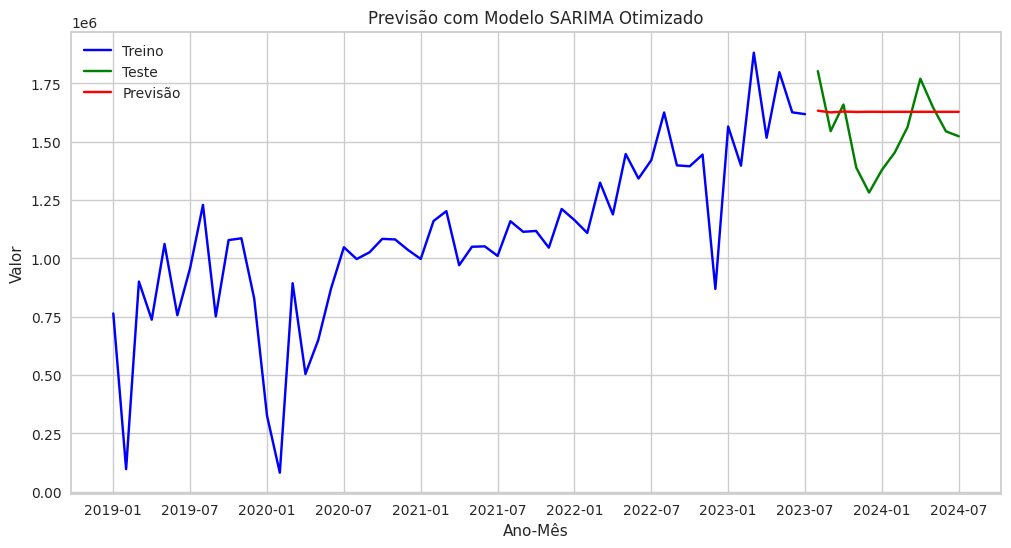

In [30]:
# Visualizar os dados
import matplotlib.pyplot as plt

# Visualizar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df['ano-mes'][:len(df)-12], df['value'][:len(df)-12],  label='Treino', color='blue')
plt.plot(df['ano-mes'][len(df)-12:], df['value'][len(df)-12:], label='Teste', color='green')
plt.plot(df['ano-mes'][len(df)-12:], predictions, label='Previsão', color='red')
plt.title('Previsão com Modelo SARIMA Otimizado')
# apresentar os valores no eixo x em intervalos de 4
plt.xticks(df['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [23]:

# Criar um modelo SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Prever os valores
forecast = model_fit.forecast(steps=12)

# Calcular o erro
rmse = root_mean_squared_error(test, forecast)
print(f'RMSE: {rmse}')

mse = mean_squared_error(test, forecast)
print(f'MSE: {mse}')

RMSE: 283655.4908282165
MSE: 80460437476.99641


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

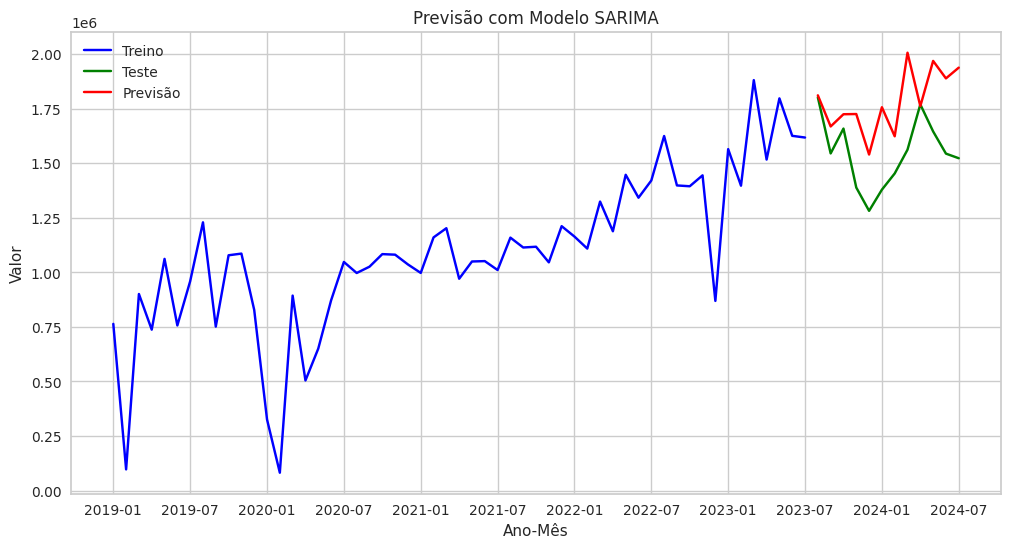

In [24]:
import matplotlib.pyplot as plt

# Visualizar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df['ano-mes'][:len(df)-12], df['value'][:len(df)-12],  label='Treino', color='blue')
plt.plot(df['ano-mes'][len(df)-12:], df['value'][len(df)-12:], label='Teste', color='green')
plt.plot(forecast, label='Previsão', color='red')
plt.title('Previsão com Modelo SARIMA')
# apresentar os valores no eixo x em intervalos de 4
plt.xticks(df['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [19]:
# Time Series Forecasting with random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Criar um modelo Random Forest
model = RandomForestRegressor()

# Treinar o modelo
model.fit(train.index.values.reshape(-1, 1), train.values)

# range de valores para prever
index = range(len(train), len(train)+12)

# Reshape para prever
index = pd.Series(index)
index = index.values.reshape(-1, 1)

# Prever os valores
forecast = model.predict(index)

# Calcular o erro
rmse = root_mean_squared_error(test, forecast)
print(f'RMSE: {rmse}')

RMSE: 488790.011503234


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

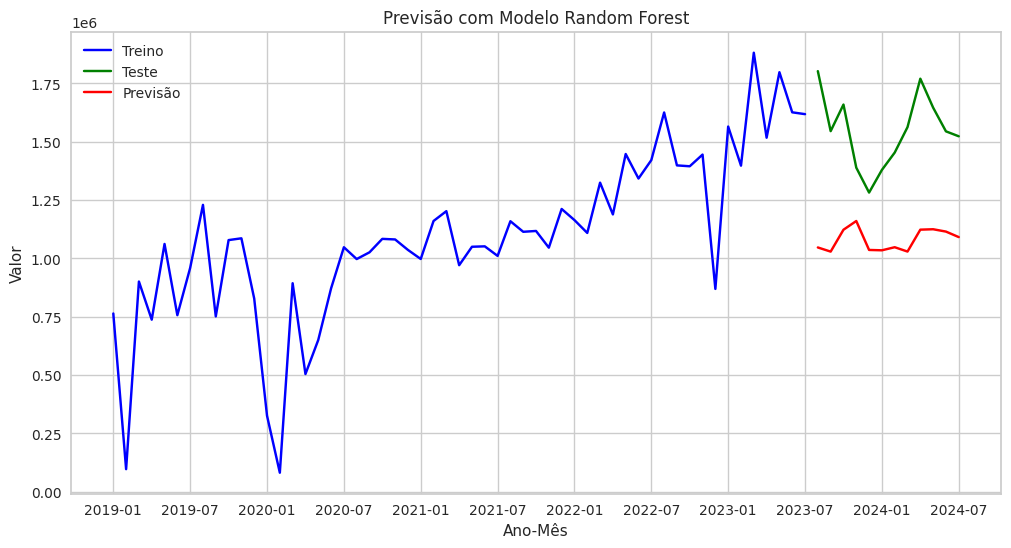

In [20]:
# Visualizar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df['ano-mes'][:len(df)-12], df['value'][:len(df)-12],  label='Treino', color='blue')
plt.plot(df['ano-mes'][len(df)-12:], df['value'][len(df)-12:], label='Teste', color='green')
plt.plot(df['ano-mes'][len(df)-12:], forecast, label='Previsão', color='red')
plt.title('Previsão com Modelo Random Forest')
# apresentar os valores no eixo x em intervalos de 4
plt.xticks(df['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [18]:
# Time Series Forecasting with Linear Regression
from sklearn.linear_model import LinearRegression

# Criar um modelo de Regressão Linear
model = LinearRegression()

# Treinar o modelo
model.fit(train.index.values.reshape(-1, 1), train.values)

# Prever os valores
forecast = model.predict(index)

# Calcular o erro
rmse = root_mean_squared_error(test, forecast)
print(f'RMSE: {rmse}')

RMSE: 458085.9330036302


In [22]:
# Time Series Forecasting with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Criar um modelo de Regressão Logística
model = LogisticRegression()

# Treinar o modelo
model.fit(train.index.values.reshape(-1, 1), train.values)

# Prever os valores
forecast = model.predict(index)

# Calcular o erro
rmse = root_mean_squared_error(test, forecast)
print(f'RMSE: {rmse}')

RMSE: 492304.355581653


In [26]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK


# Função para treinar e avaliar o modelo SARIMA
def objective(params):
    # Extrair os parâmetros da busca
    order = (int(params['p']), int(params['d']), int(params['q']))
    seasonal_order = (int(params['P']), int(params['D']), int(params['Q']), 12)  # Sazonalidade de 12 meses
    
    # Treinar o modelo SARIMA
    try:
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        
        # Fazer previsões no conjunto de teste
        predictions = results.predict(start=test.index[0], end=test.index[-1])
        
        # Calcular RMSE
        rmse = np.sqrt(mean_squared_error(test, predictions))
        
        # Retornar o RMSE como a métrica de avaliação
        return {'loss': rmse, 'status': STATUS_OK}
    
    except Exception as e:
        # Se algo falhar, retornar uma perda alta
        return {'loss': 100, 'status': STATUS_FAIL}

# Espaço de busca dos hiperparâmetros
space = {
    'p': hp.quniform('p', 0, 3, 1),
    'd': hp.quniform('d', 0, 2, 1),
    'q': hp.quniform('q', 0, 3, 1),
    'P': hp.quniform('P', 0, 3, 1),
    'D': hp.quniform('D', 0, 2, 1),
    'Q': hp.quniform('Q', 0, 3, 1)
}

# Função de otimização
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Melhor conjunto de hiperparâmetros
print("Best parameters:", best_params)

100%|██████████| 50/50 [01:00<00:00,  1.21s/trial, best loss: 799564.3426511046]
Best parameters: {'D': 1.0, 'P': 1.0, 'Q': 2.0, 'd': 0.0, 'p': 2.0, 'q': 3.0}


In [27]:
# Avaliar o modelo com os melhores hiperparâmetros
order = (int(best_params['p']), int(best_params['d']), int(best_params['q']))
seasonal_order = (int(best_params['P']), int(best_params['D']), int(best_params['Q']), 12)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)
predictions = results.predict(start=test.index[0], end=test.index[-1])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

RMSE: 799564.3426511046


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

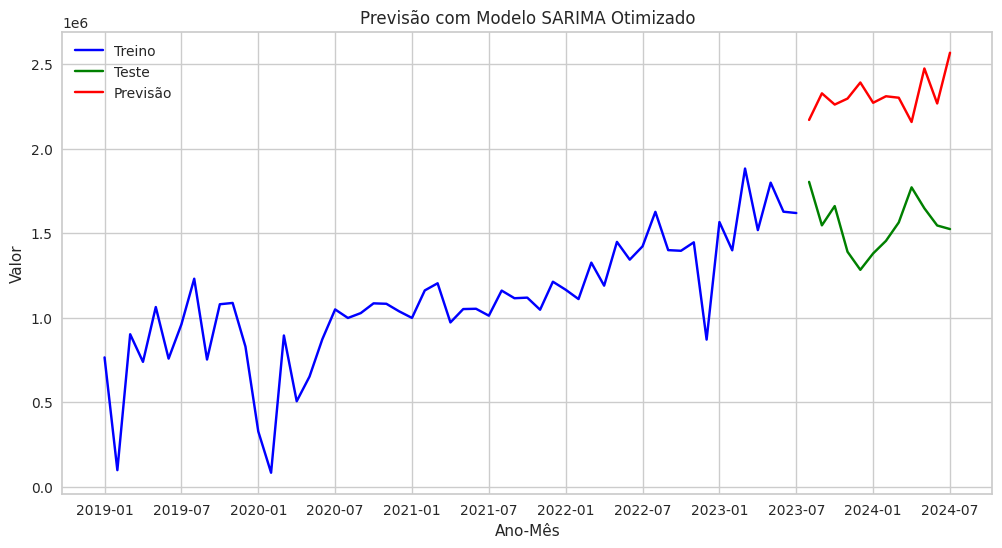

In [28]:
# Visualizar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df['ano-mes'][:len(df)-12], df['value'][:len(df)-12],  label='Treino', color='blue')
plt.plot(df['ano-mes'][len(df)-12:], df['value'][len(df)-12:], label='Teste', color='green')
plt.plot(df['ano-mes'][len(df)-12:], predictions, label='Previsão', color='red')
plt.title('Previsão com Modelo SARIMA Otimizado')
# apresentar os valores no eixo x em intervalos de 4
plt.xticks(df['ano-mes'][::6])
plt.xlabel('Ano-Mês')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [ ]:
# Testar com arima

